## Amazon E-Commerce Sales Data Analysis

### Objective

### Amazon E-commerce company wants to analyze and track their online sales across India in year 2022 and Analyze market trend and customers beheviour to target them for maximizing online business performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Dell/Documents/Desktop/python datasets/Amazon Sales Data/Amazon Sale Report.csv")
df.shape

(128975, 24)

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

### ship-city,ship-state,ship-postal-code,ship-country has a 0% null values
### currency,Amount has a 6% null values
### Courier Status has a 5% null values

In [6]:
# drop columns
df.drop(['promotion-ids', 'fulfilled-by', 'Unnamed: 22'], axis=1, inplace=True)

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
df.shape

(116016, 21)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
# change data type & create new column
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month

In [12]:
# rename column
df.rename(columns={'Qty':'Quantity'}, inplace=True)

In [13]:
# use describe() for specific columns
df[['Quantity', 'Amount']].describe()

,Quantity,Amount
count,116016.000000,116016.000000
mean,1.003775,649.780849
std,0.072651,282.648892
min,1.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,606.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [14]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Quantity', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month'],
      dtype='object')

### Exploratory Data Analysis

### count fulfilment

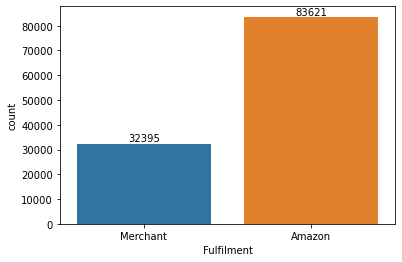

In [15]:
cf = sns.countplot(x = 'Fulfilment', data = df)

for bar in cf.containers:
    cf.bar_label(bar)

### from above graph we can see that most of the customers used Amazon fulfilment compare to Merchant.

### count ship-service-level

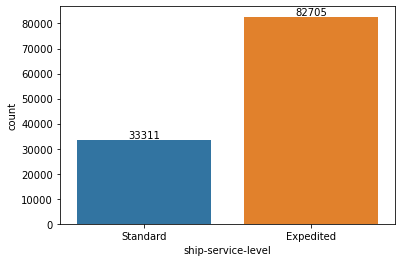

In [16]:
cs = sns.countplot(x = 'ship-service-level', data = df)

for bar in cs.containers:
    cs.bar_label(bar)

### from above graph we can see that most of the ship-service-level is Expedited compare to Standard.

### count courier status

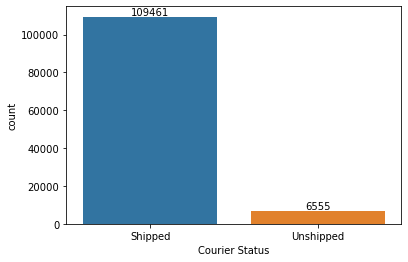

In [17]:
cs = sns.countplot(x = 'Courier Status', data = df)

for bar in cs.containers:
    cs.bar_label(bar)

### from above graph we can see that most of the courier status are Shipped compare to Unshipped.

### Group by

### Size

In [18]:
df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by="Quantity", ascending=False)

,Size,Quantity
6,M,20422
5,L,19963
8,XL,18898
10,XXL,16487
7,S,15309
0,3XL,13505
9,XS,9928
3,6XL,687
2,5XL,512
1,4XL,396


<AxesSubplot:xlabel='Size', ylabel='Quantity'>

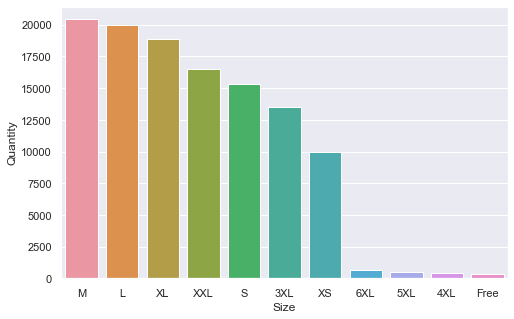

In [29]:
Size_quantity = df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by="Quantity", ascending=False)

sns.barplot(x = 'Size', y= 'Quantity', data = Size_quantity)

### from above graph we can see that most of the Quantites are from M, L and XL Size respectively.

### Category

In [20]:
df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

,Category,Amount
5,Set,37653476
8,kurta,20445273
7,Western Dress,10628361
6,Top,5202753
3,Ethnic Dress,760711
0,Blouse,434751
1,Bottom,140226
4,Saree,118509
2,Dupatta,915


<AxesSubplot:xlabel='Category', ylabel='Amount'>

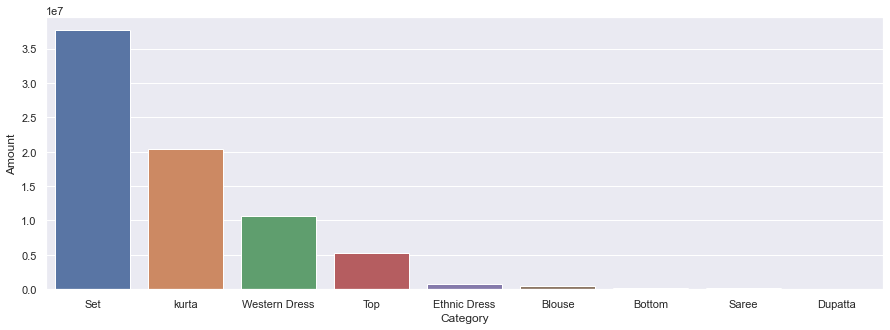

In [21]:
Sales_Category = df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Category', y= 'Amount', data = Sales_Category)

### from above graph we can see that most of the sold clothes are from Set, Kurta and Western Dress category.

### states

In [22]:
df.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

,ship-state,Amount
27,MAHARASHTRA,12864511
22,KARNATAKA,10153100
55,TELANGANA,6642955
57,UTTAR PRADESH,6494393
54,TAMIL NADU,6241913
...,...,...
43,Pondicherry,529
66,rajsthan,521
2,AR,493
51,Rajsthan,443


<AxesSubplot:xlabel='ship-state', ylabel='Amount'>

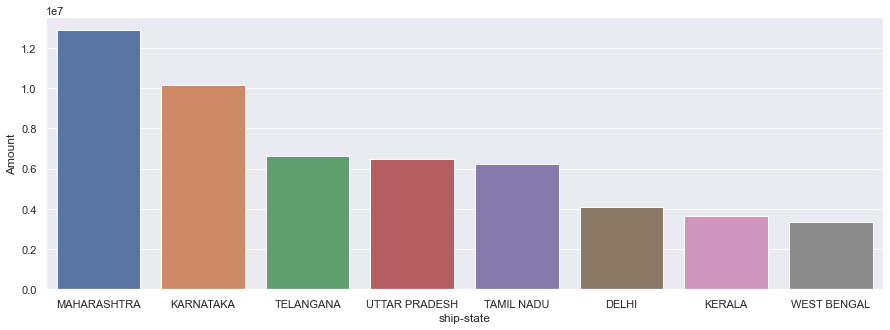

In [23]:
# total amount/sales from top 8 states
sales_states =  df.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_states, x = 'ship-state', y= 'Amount')

### from above graphs we can see that most of the total sales/amount are from Maharashtra, Kernataka and Telangana state respectively.

### city

In [24]:
df.groupby(['ship-city'], as_index=False)['Quantity'].sum().sort_values(by="Quantity", ascending=False)

,ship-city,Quantity
734,BENGALURU,10422
2754,HYDERABAD,7333
4550,MUMBAI,5650
5114,NEW DELHI,5252
1385,CHENNAI,4937
...,...,...
5406,Nilje Dombivli East,1
2382,GIDI,1
2380,GIDC PANOLI,1
5410,Niuland,1


<AxesSubplot:xlabel='ship-city', ylabel='Quantity'>

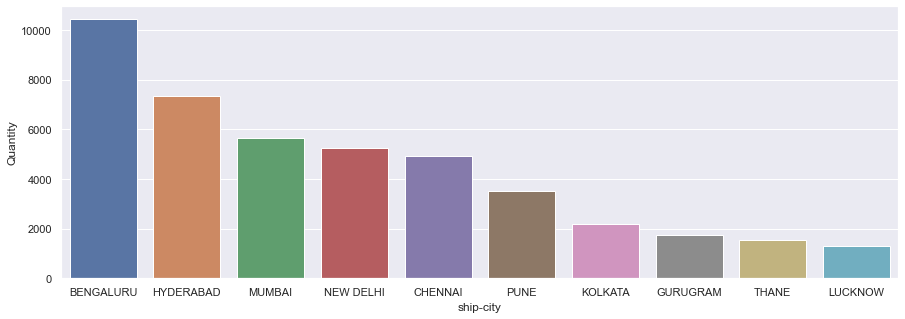

In [25]:
city_quantity = df.groupby(['ship-city'], as_index=False)['Quantity'].sum().sort_values(by="Quantity", ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'ship-city', y= 'Quantity', data = city_quantity)

### from above graph we can see that most of the Quantites are from Bengaluru, Hyderabad and Mumbai city respectively.

### Month

In [26]:
df.groupby(['Month'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

,Month,Amount
1,4,27575532
2,5,25112855
3,6,22598327
0,3,98261


<AxesSubplot:xlabel='Month', ylabel='Amount'>

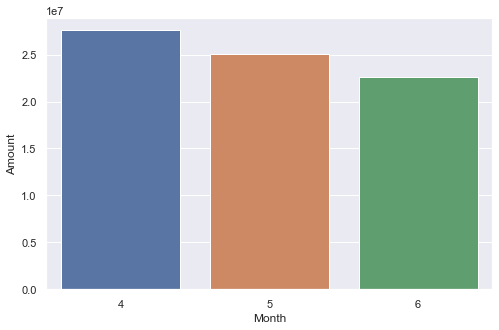

In [27]:
sales_month =  df.groupby(['Month'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(3)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data = sales_month, x = 'Month', y= 'Amount')

### from above graphs we can see that most of the total sales/amount are in April, May and June month respectively.

### Conclusion:

### We can target customers from Maharashtra, Kernataka and Telangana state and also Bengaluru, Hyderabad  and Mumbai city are more likely to buy cloths from Set, Kurta and Western Dress category in L, M and XL Size and we can gives offers in April, May and June month.